# Rodrigo Mendoza
# Practica Calcular Word2Vec sobre nuestro propio Texto

In [1]:
import nltk

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, TweetTokenizer

In [3]:
from gensim.models import KeyedVectors, Word2Vec

In [4]:
def get_texts_from_file(path_corpus, path_truth):

    tr_txt = [] # Aqui van los twits
    tr_y = [] # Aqui van las etiquetas

    with open(path_corpus, 'r', encoding='utf-8') as f_corpus, open(path_truth , 'r', encoding='utf-8') as f_truth:

        for twitt in f_corpus:
            tr_txt += [twitt]

        for label in f_truth:
            tr_y += [label]

    return tr_txt,tr_y

In [6]:
from pathlib import Path

base = Path.cwd().parent

path_corpus = base / 'Datos y Scripts-20250828' / 'mex20_train.txt'
path_truth = base / 'Datos y Scripts-20250828' / 'mex20_train_labels.txt'
tr_txt, tr_y = get_texts_from_file(path_corpus,path_truth)

In [7]:
print(len(tr_y))
len(tr_txt)

5278


5278

In [8]:
tokenizer = TweetTokenizer()

In [9]:
sentences = []
for doc in tr_txt:
    doc = doc.lower()
    tokens = tokenizer.tokenize(doc)
    sentences.append(tokens)


In [10]:
model = Word2Vec(sentences, vector_size=50, window = 5, min_count=1, workers=4)

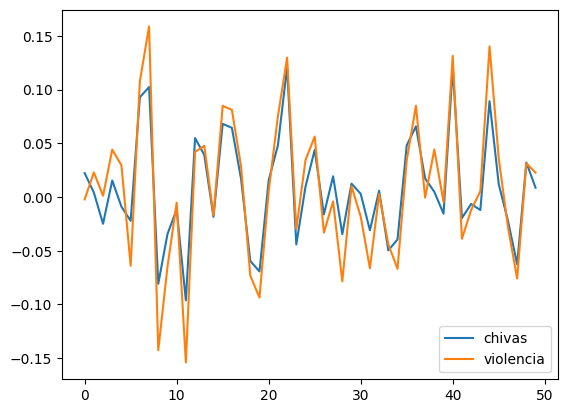

In [11]:
plt.plot(model.wv['chivas'][:50], label='chivas')
plt.plot(model.wv['violencia'][:50], label='violencia')

plt.legend()

In [12]:
model.wv.most_similar('chivas')

[('anda', 0.9779776930809021),
 ('mensajes', 0.9779599905014038),
 ('pedo', 0.9779208302497864),
 ('esté', 0.9775527715682983),
 ('🤤', 0.9775431752204895),
 ('#putita', 0.9772422909736633),
 ('ahorita', 0.9771338701248169),
 ('servicio', 0.977123498916626),
 ('dice', 0.9770892858505249),
 ('vida', 0.977074384689331)]

In [13]:
model.wv.most_similar('hdp')

[('mamar', 0.9992353320121765),
 ('..', 0.9991298913955688),
 ('putos', 0.9990667700767517),
 ('pinche', 0.9989678859710693),
 ('méxico', 0.9989306926727295),
 ('puto', 0.9988493919372559),
 ('jajaja', 0.9987430572509766),
 ('cabrona', 0.9986553192138672),
 ('ese', 0.9986496567726135),
 ('pendejos', 0.9986135363578796)]

In [14]:
corpus_de_palabras = []

for doc in tr_txt:
    corpus_de_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_de_palabras)

In [15]:
def sortFreqDist(freqDist):
    aux = [(freqDist[key], key) for key in freqDist]
    aux.sort()
    aux.reverse()
    return aux
V = sortFreqDist(fdist) # [frecuencia, palabra]
V = V[:5000]


In [16]:
dict_indices = dict()

cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

In [17]:
dict_indices_alreves = {}
for palabra, indice in dict_indices.items():
    dict_indices_alreves[indice] = palabra


In [18]:
# Que ponga la frecuencia en lugar de binario
import numpy as np
def built_bow_tr(tr_txt, vocabulario, dict_indices):
    # Objetivo: Construir la matriz de bow
    bow = np.zeros((len(tr_txt), len(vocabulario)), dtype=int)
    cont_doc = 0
    # Rellenar la matriz, cada renglon es un twitt y cada renglon una palabra
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr.lower()))
        for word in fdist_doc:
            if word in dict_indices:
                bow[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc +=1
    return bow


In [19]:
bow_tr = built_bow_tr(tr_txt, V, dict_indices)
bow_tr

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], shape=(5278, 5000))

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

feats = SelectKBest(chi2, k=1000)

feats.fit(bow_tr, tr_y)

,"score_func score_func: callable, default=f_classifFunction taking two arrays X and y, and returning a pair of arrays(scores, pvalues) or a single array with scores.Default is f_classif (see below ""See Also""). The default function onlyworks with classification tasks... versionadded:: 0.18",<function chi...002568041E160>
,"k k: int or ""all"", default=10Number of top features to select.The ""all"" option bypasses selection, for use in a parameter search.",1000


In [21]:
best = feats.get_support(indices=True)

In [22]:
target_words = [dict_indices_alreves[index] for index in best]

In [23]:
words = [word for word in target_words if word in model.wv]
target_matrix = np.array([model.wv[word] for word in words])

from sklearn.manifold import TSNE
from sklearn import preprocessing
target_matrix=preprocessing.normalize(target_matrix, norm="l2")

reduce_matrix = TSNE(n_components=2).fit_transform(target_matrix)


# Costelacion de palabras con Word2Vec

In [24]:
# Sacar costelacion word2vec
max_x , max_y = np.max(reduce_matrix, axis=0)
min_x , min_y = np.min(reduce_matrix, axis=0)


print(f"max_x: {max_x}, max_y: {max_y}")
print(f"min_x: {min_x}, min_y: {min_y}")

max_x: 16.857940673828125, max_y: 17.81859016418457
min_x: -17.69291114807129, min_y: -17.877721786499023


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_12244\1913349944.py:17: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  plt.savefig('word_constellation.png', bbox_inches='tight')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_12244\1913349944.py:17: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from font(s) DejaVu Sans.
  plt.savefig('word_constellation.png', bbox_inches='tight')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_12244\1913349944.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig('word_constellation.png', bbox_inches='tight')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_12244\1913349944.py:17: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from font(s) DejaVu Sans.
  plt.savefig('word_constellation.png', bbox_inches='tight')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_12244\1913349944.py:17: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from font(s) Deja

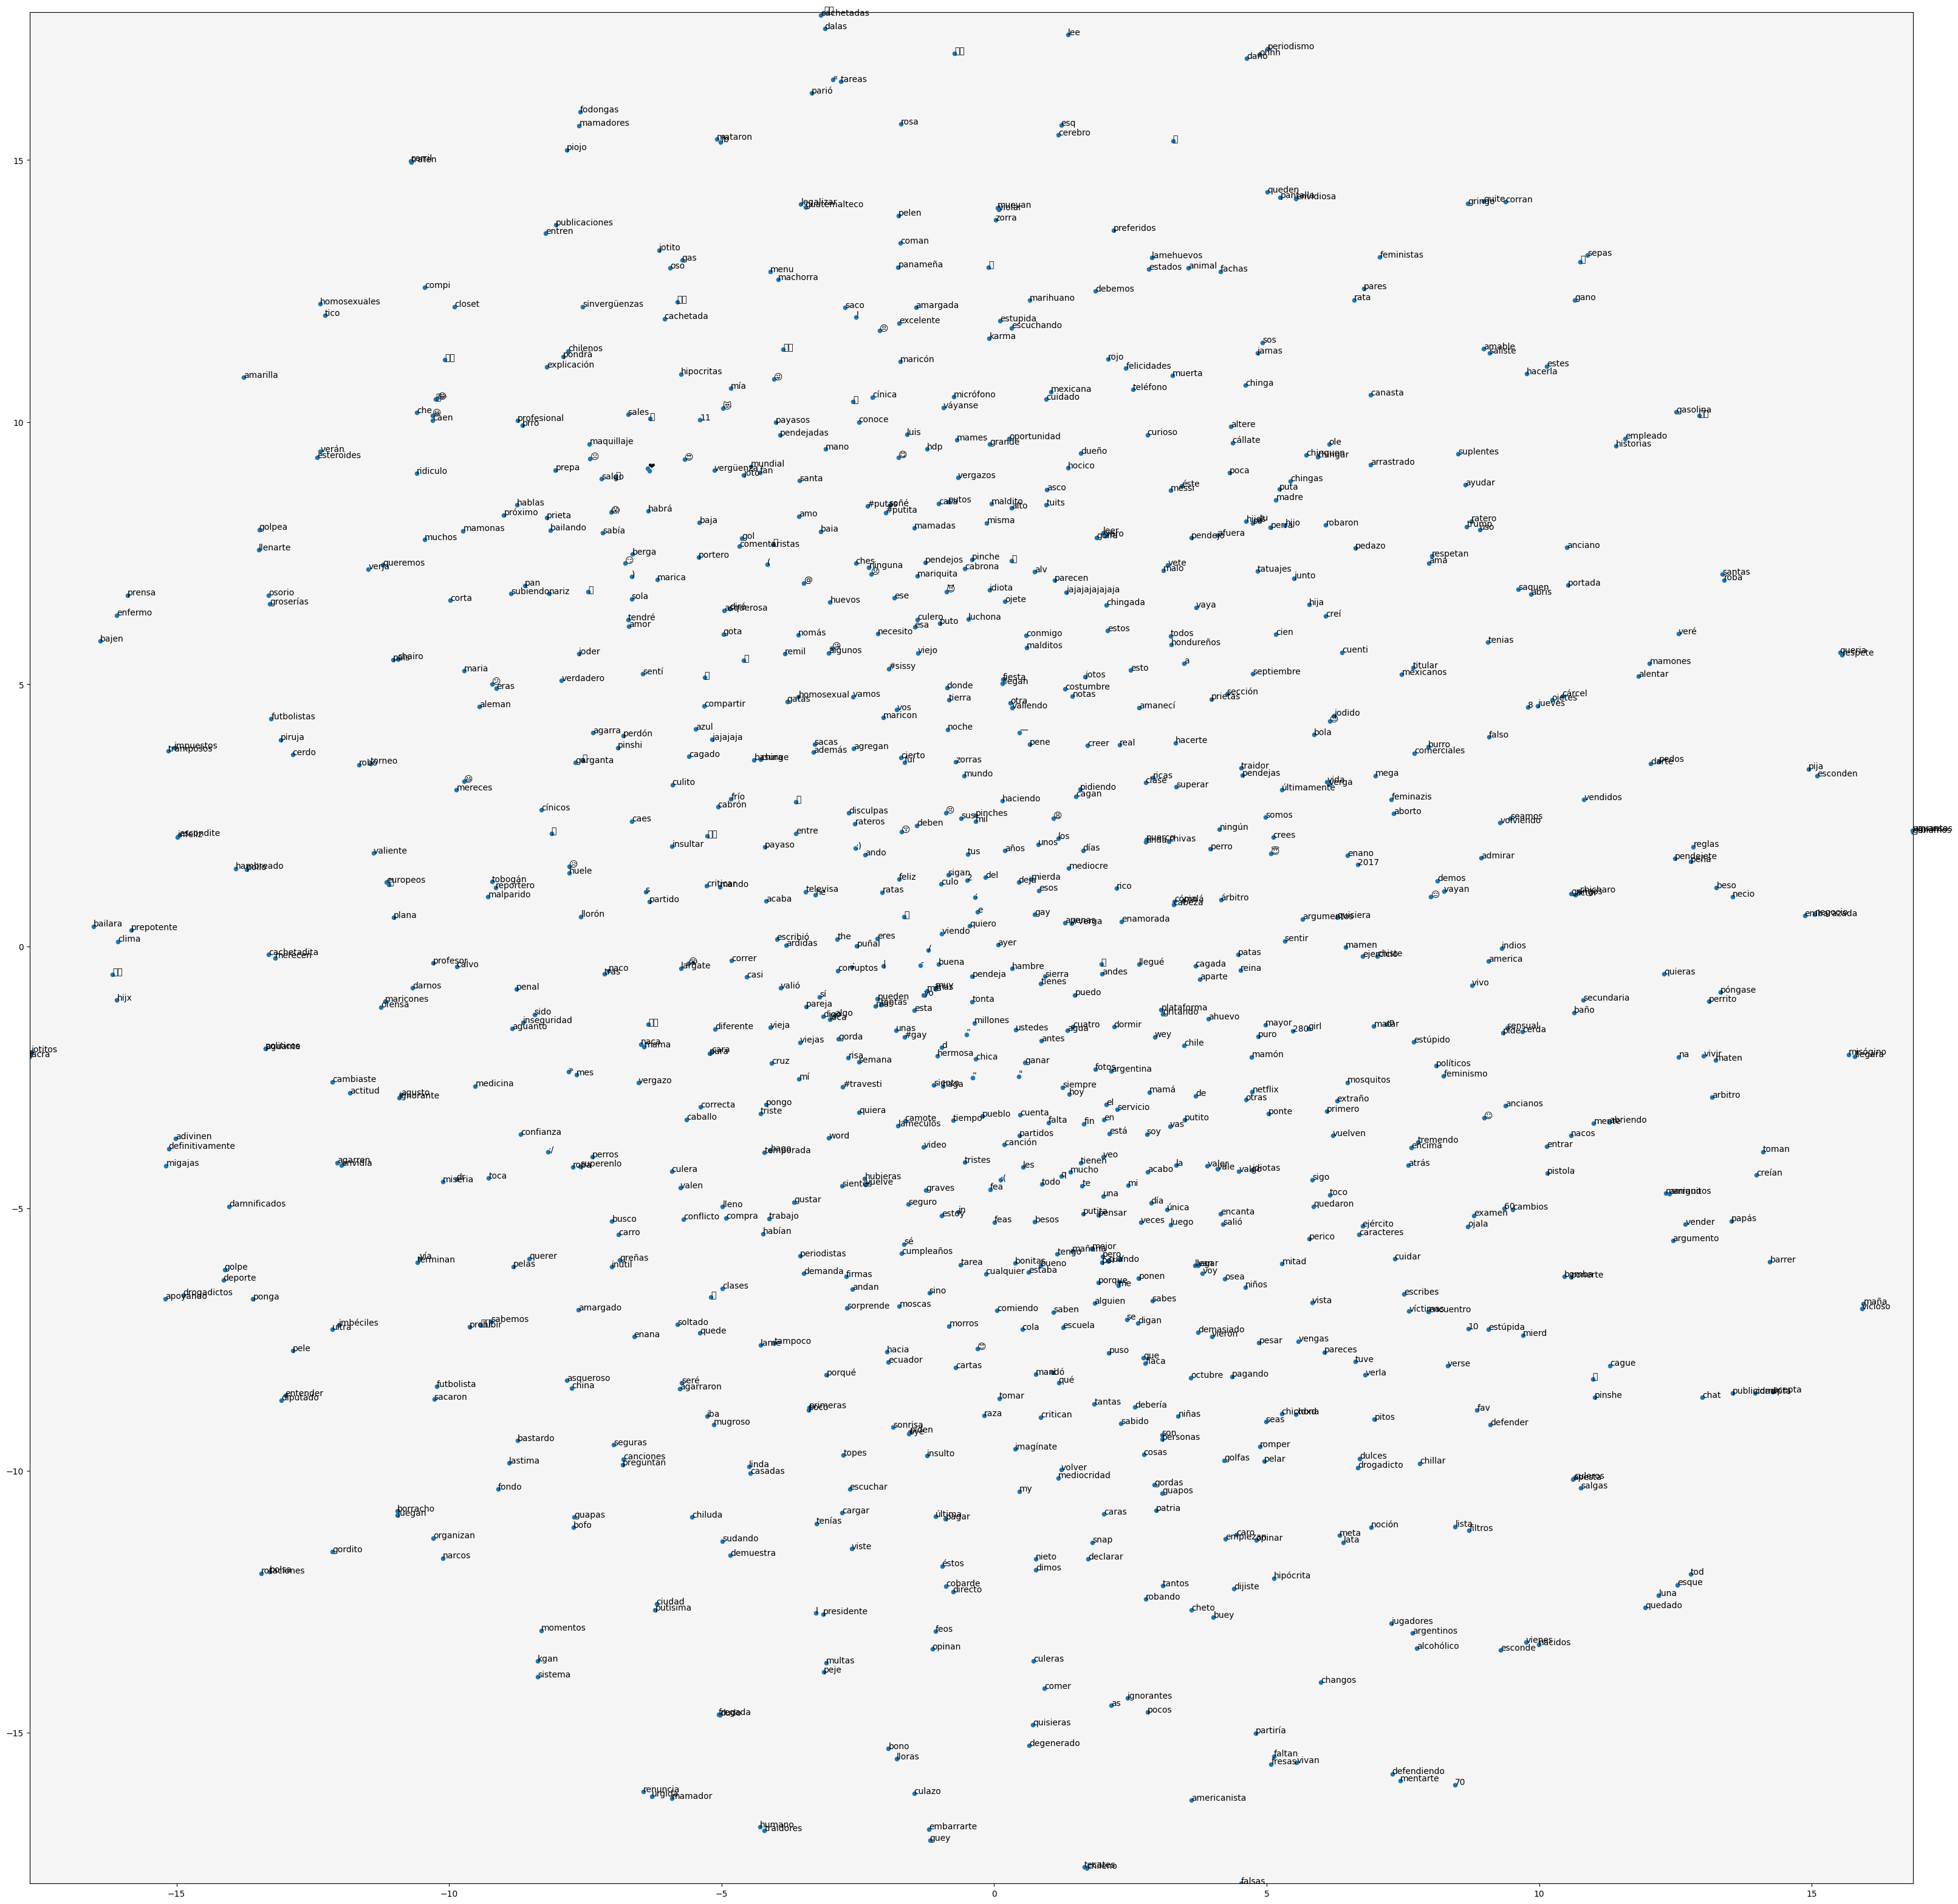

In [25]:
from matplotlib import patheffects
from nltk.corpus import stopwords

x, y = reduce_matrix[:, 0], reduce_matrix[:, 1]

plt.figure(figsize=(40, 40), dpi=100)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.scatter(reduce_matrix[:, 0], reduce_matrix[:, 1], 20)

for i, word in enumerate(words[:]):
  x = reduce_matrix[i, 0]
  y = reduce_matrix[i, 1]
  plt.annotate(word,(x, y))

plt.gca().set_facecolor('whitesmoke')
plt.savefig('word_constellation.png', bbox_inches='tight')
plt.show()


In [26]:
from sklearn.decomposition import PCA

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(int(len(data)/2)):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+int(len(data)/2)],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )

In [28]:
'''
def analogy(worda, wordb, wordc):
    result = model.wv.most_similar(negative=[worda],
                                positive=[wordb, wordc])
    return result[0][0]
countries = ['USA', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']
presidents = [analogy('Mexico', 'tacos', country) for country in countries]
pp(zip(countries,presidents))
'''
# No hay analogias claras en este corpus

"\ndef analogy(worda, wordb, wordc):\n    result = model.wv.most_similar(negative=[worda],\n                                positive=[wordb, wordc])\n    return result[0][0]\ncountries = ['USA', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']\npresidents = [analogy('Mexico', 'tacos', country) for country in countries]\npp(zip(countries,presidents))\n"

In [29]:
'''
labels = countries + presidents
data = [model[w] for w in labels]
plot_data(data, labels)
'''

'\nlabels = countries + presidents\ndata = [model[w] for w in labels]\nplot_data(data, labels)\n'